In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [13]:
# 读取数据
all_data = pd.read_csv('data_2.csv')
x,y = all_data.loc[:,all_data.columns!='Tc.1'],all_data.loc[:,"Tc.1"]

In [14]:
#标准化
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [15]:
# 选择需要进行PCA的特征
def perform_pca(data, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(data)
    transformed_data = pca.transform(data)
    return transformed_data

x = perform_pca(x, 3)

In [7]:
#使用SVD进行降维
svd = TruncatedSVD(n_components=3)
x = svd.fit_transform(x)

In [16]:
#划分数据集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=90)

In [17]:
# 创建一个线性回归模型
base_estimator = LinearRegression()
bagging_regressor = BaggingRegressor(n_estimators=10, random_state=50)

# 输入训练数据
bagging_regressor.fit(X_train, y_train)

# 预测
y_pred = bagging_regressor.predict(X_test)

# 计算MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# 计算RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)

# 计算R2
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)



Mean Squared Error: 56.10763230553305
Root Mean Squared Error: 7.4905028072575375
R-squared: 0.9221835915343034


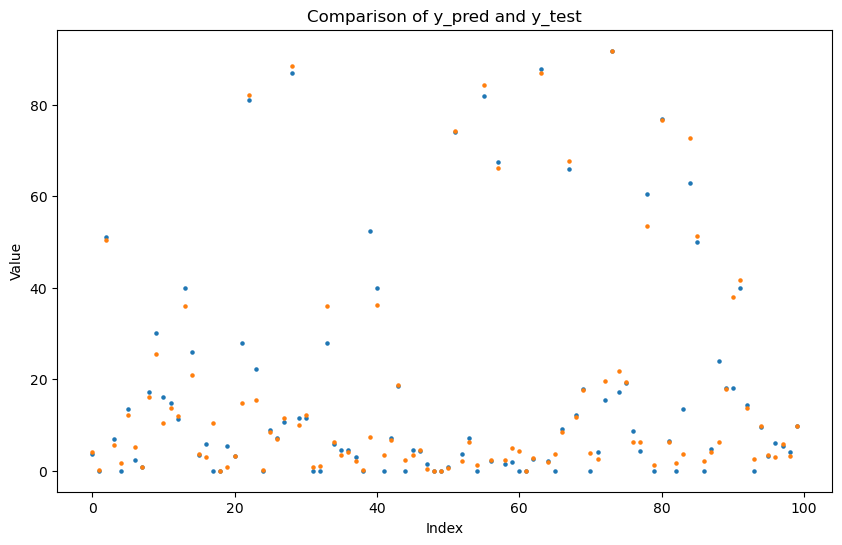

In [18]:
indexs=range(1000)
lst=random.sample(indexs,100)
y_pred_sample=[]
y_test_sample=[]
for i in lst:
    y_pred_sample.append(y_pred[i])
    y_test_sample.append(y_test.iloc[i])
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_sample)),y_test_sample, label='Actual',s=5)
plt.scatter(range(len(y_test_sample)),y_pred_sample, label='Predicted',s=5)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of y_pred and y_test')
plt.show()


In [11]:
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')
np.savetxt('y_pred.txt', y_pred, fmt='%s')
np.savetxt('y_test.txt', y_test, fmt='%s')